In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def compute_roc_data():
    all_ids = labels_to_indices.values()
    all_ids = [item for sublist in all_ids for item in sublist]

    roc_data = []
    for t in np.arange(0.1, 1.0, 0.1):
        print(f'Training model with threshold: {t}')
        match_finder = MatchFinder(distance=CosineSimilarity(), threshold=t)
        inference_model = InferenceModel(model, match_finder=match_finder)
        inference_model.train_knn(dataset)

        good = 0
        wrong = 0
        tn = 0
        fn = 0
        tp = 0
        fp = 0
        print('\tMoving to evaluation')
        for target_writer, target_ids in labels_to_indices.items():
            mask = np.isin(all_ids, target_ids, invert=True)
            non_target_ids = np.array(all_ids)[mask]
            picked_same = np.random.choice(target_ids, (100,2))

            picked_non_target = np.random.choice(non_target_ids, 100)
            picked_target = np.random.choice(target_ids, 100)
            picked_different = np.vstack((picked_non_target, picked_target)).T

            for idx, a in enumerate(picked_same):
                (x, _), (y, _) = dataset[a[0]], dataset[a[1]]
                decision = inference_model.is_match(x.unsqueeze(0), y.unsqueeze(0))

                if decision == True:
                    good += 1
                    tp +=1
                else:
                    wrong += 1
                    fp += 1

            for idx, a in enumerate(picked_different):
                (x, _), (y, _) = dataset[a[0]], dataset[a[1]]
                decision = inference_model.is_match(x.unsqueeze(0), y.unsqueeze(0))
                res2[idx] = 1 if decision else 0
                if decision == False:
                    good += 1
                    tn += 1
                else:
                    wrong += 1
                    fn +=1
        roc_data.append((good, wrong, tp, fp, tn, tp))
        print('\tscore for this threshold', good, wrong, good/(good+wrong), '\n')
        return roc_data

In [3]:
# Precomputed values from testing of various thresholds
roc_data = [
    (3913, 287, 2073, 27, 1840, 260),
    (4045, 155, 2062, 38, 1983, 117),
    (4099, 101, 2050, 50, 2049, 51),
    (4062, 138, 2010, 90, 2052, 48),
    (4057, 143, 1980, 120, 2077, 23),
    (4039, 161, 1957, 143, 2082, 18),
    (3955, 245, 1863, 237, 2092, 8),
    (3824, 376, 1729, 371, 2095, 5),
    (3554, 646, 1456, 644, 2098, 2),
]

In [4]:
# Uncomment this line to compute ROC data, but beware that it is a long process
# and without powerful it may take even several hours
# compute_roc_data()

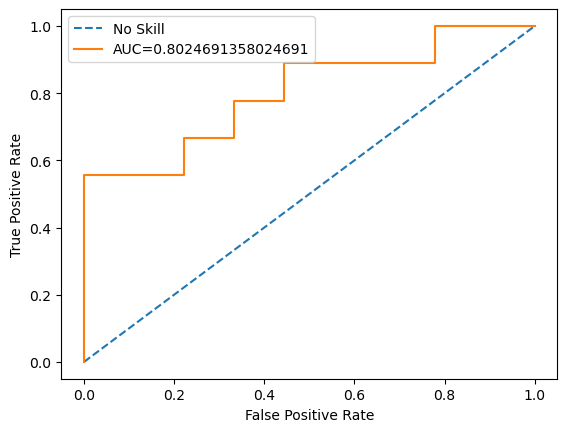

In [5]:
# Preparation of data for ROC
cls = []
preds = []
for _, _, tp, fp, tn, fn in roc_data:
    cls.append(0)
    cls.append(1)
    preds.append(tp/(tp+fp))
    preds.append(tn/(tn+fn))

# Diagonal for increased readability of ROC
diagonal = [0 for _ in range(len(roc_data)*2)]
diag_fpr, diag_tpr, _ = metrics.roc_curve(cls, diagonal)
plt.plot(diag_fpr, diag_tpr, linestyle='--', label='No Skill')

# Computation of ROC and AUC
fpr, tpr, _ = metrics.roc_curve(cls, preds)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={auc}')

plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()